In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [3]:
data=pd.read_csv("/kaggle/input/iris/Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.drop('Id',axis=1,inplace=True)

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

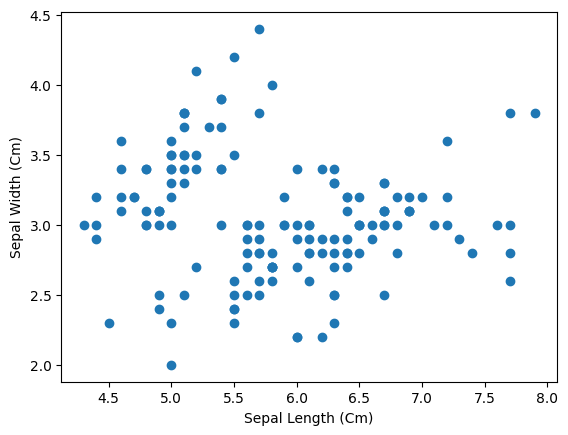

In [10]:
plt.scatter(x=data["SepalLengthCm"], y=data["SepalWidthCm"])
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("Sepal Width (Cm)")
plt.show()

In [11]:
setosaData = data[data["Species"] == "Iris-setosa"]
versicolorData = data[data["Species"] == "Iris-versicolor"]
virginicaData = data[data["Species"] == "Iris-virginica"]

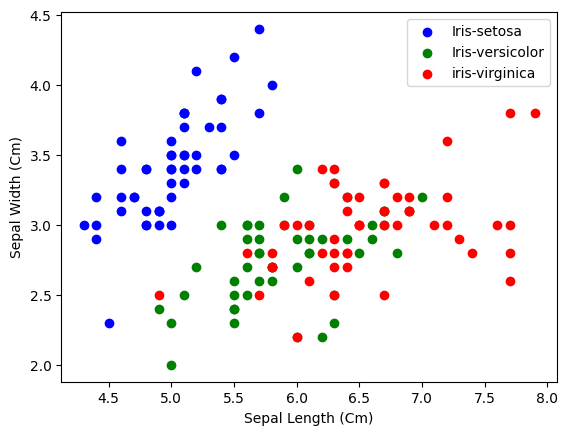

In [12]:
plt.scatter(x=setosaData["SepalLengthCm"], y=setosaData["SepalWidthCm"], color='blue', label='Iris-setosa')
plt.scatter(x=versicolorData["SepalLengthCm"], y=versicolorData["SepalWidthCm"], color='green', label='Iris-versicolor')
plt.scatter(x=virginicaData["SepalLengthCm"], y=virginicaData["SepalWidthCm"], color='red', label='iris-virginica')
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("Sepal Width (Cm)")
plt.legend()
plt.show()

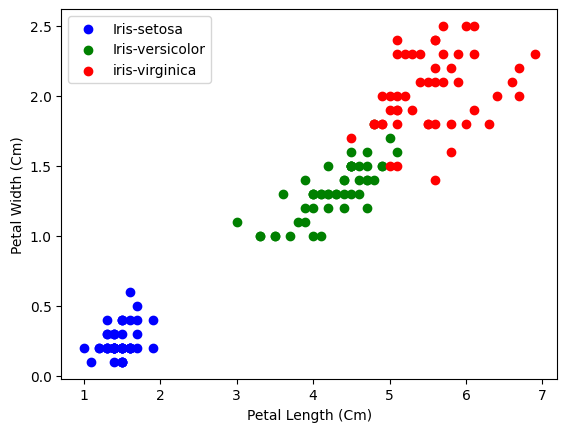

In [13]:
plt.scatter(x=setosaData["PetalLengthCm"], y=setosaData["PetalWidthCm"], color='blue', label='Iris-setosa')
plt.scatter(x=versicolorData["PetalLengthCm"], y=versicolorData["PetalWidthCm"], color='green', label='Iris-versicolor')
plt.scatter(x=virginicaData["PetalLengthCm"], y=virginicaData["PetalWidthCm"], color='red', label='iris-virginica')
plt.xlabel("Petal Length (Cm)")
plt.ylabel("Petal Width (Cm)")
plt.legend()
plt.show()

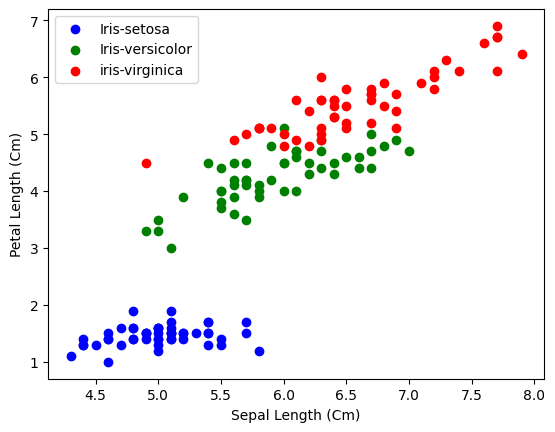

In [14]:
plt.scatter(x=setosaData["SepalLengthCm"], y=setosaData["PetalLengthCm"], color='blue', label='Iris-setosa')
plt.scatter(x=versicolorData["SepalLengthCm"], y=versicolorData["PetalLengthCm"], color='green', label='Iris-versicolor')
plt.scatter(x=virginicaData["SepalLengthCm"], y=virginicaData["PetalLengthCm"], color='red', label='iris-virginica')
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("Petal Length (Cm)")
plt.legend()
plt.show()

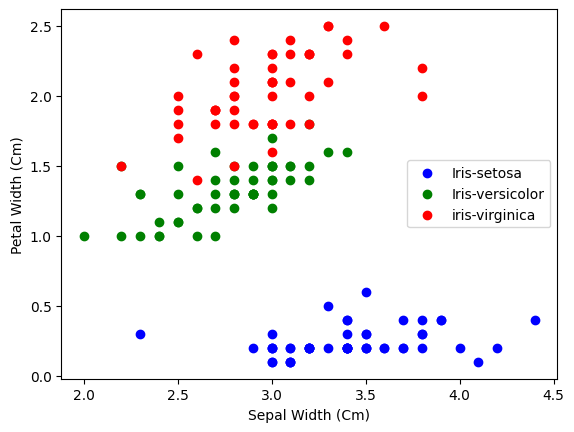

In [15]:
plt.scatter(x=setosaData["SepalWidthCm"], y=setosaData["PetalWidthCm"], color='blue', label='Iris-setosa')
plt.scatter(x=versicolorData["SepalWidthCm"], y=versicolorData["PetalWidthCm"], color='green', label='Iris-versicolor')
plt.scatter(x=virginicaData["SepalWidthCm"], y=virginicaData["PetalWidthCm"], color='red', label='iris-virginica')
plt.xlabel("Sepal Width (Cm)")
plt.ylabel("Petal Width (Cm)")
plt.legend()
plt.show()

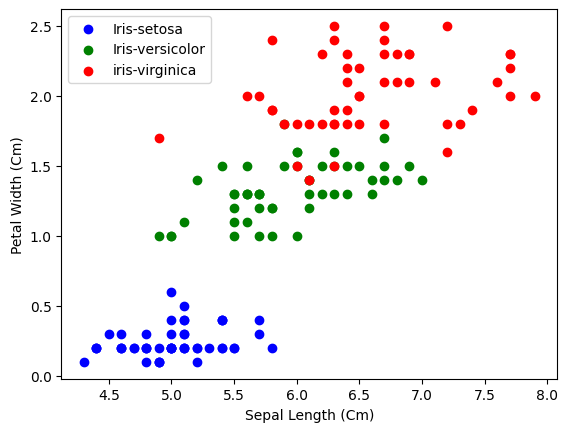

In [16]:
plt.scatter(x=setosaData["SepalLengthCm"], y=setosaData["PetalWidthCm"], color='blue', label='Iris-setosa')
plt.scatter(x=versicolorData["SepalLengthCm"], y=versicolorData["PetalWidthCm"], color='green', label='Iris-versicolor')
plt.scatter(x=virginicaData["SepalLengthCm"], y=virginicaData["PetalWidthCm"], color='red', label='iris-virginica')
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("Petal Width (Cm)")
plt.legend()
plt.show()

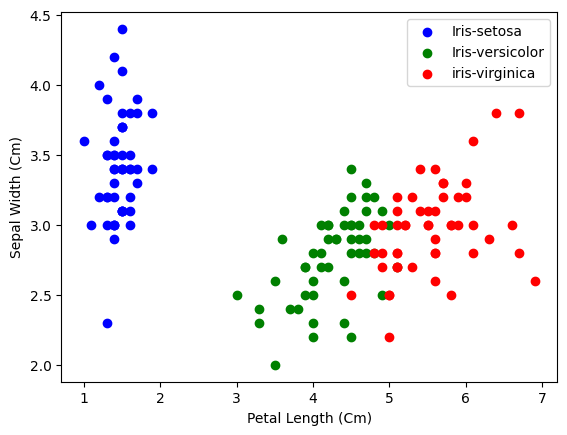

In [17]:
plt.scatter(x=setosaData["PetalLengthCm"], y=setosaData["SepalWidthCm"], color='blue', label='Iris-setosa')
plt.scatter(x=versicolorData["PetalLengthCm"], y=versicolorData["SepalWidthCm"], color='green', label='Iris-versicolor')
plt.scatter(x=virginicaData["PetalLengthCm"], y=virginicaData["SepalWidthCm"], color='red', label='iris-virginica')
plt.xlabel("Petal Length (Cm)")
plt.ylabel("Sepal Width (Cm)")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

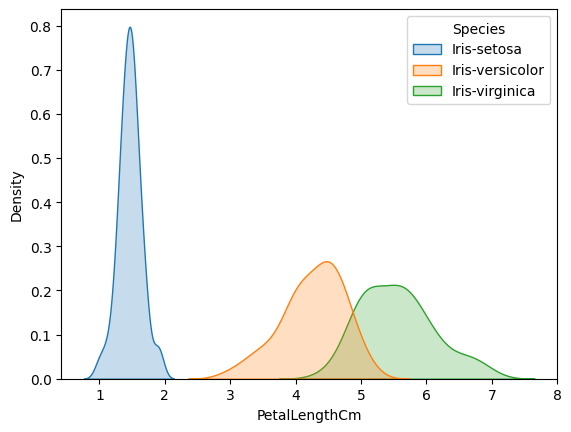

In [18]:
sns.kdeplot(x="PetalLengthCm", hue="Species", data=data, fill=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

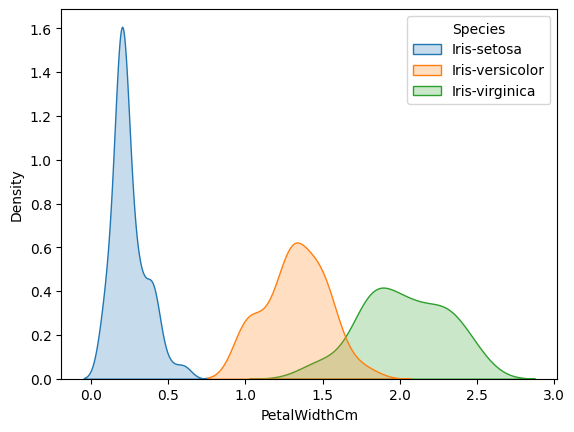

In [19]:
sns.kdeplot(x="PetalWidthCm", hue="Species", data=data, fill=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

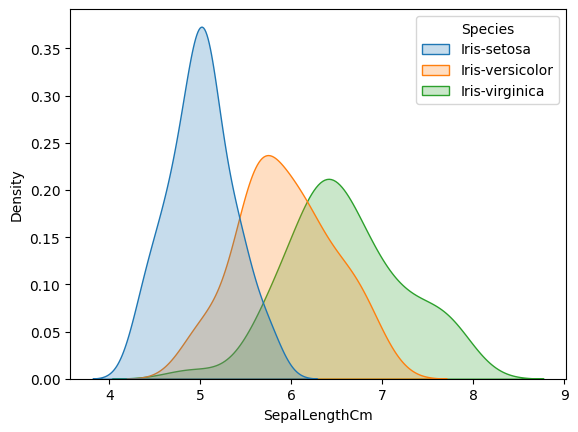

In [20]:
sns.kdeplot(x="SepalLengthCm", hue="Species", data=data, fill=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

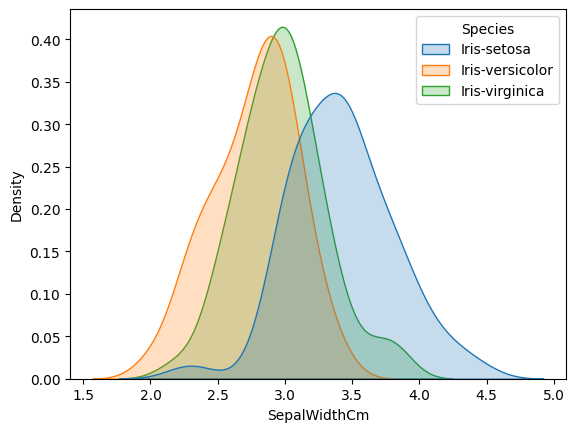

In [21]:
sns.kdeplot(x="SepalWidthCm", hue="Species", data=data, fill=True)
plt.show()

Text(0, 0.5, 'Petal Length (Blue) and Width (Green) in Cm')

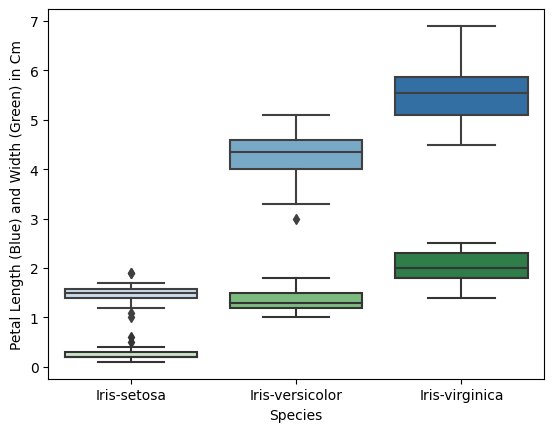

In [22]:
sns.boxplot(x="Species", y="PetalLengthCm", data=data, palette="Blues")
sns.boxplot(x="Species", y="PetalWidthCm", data=data, palette="Greens")
plt.xlabel("Species")
plt.ylabel("Petal Length (Blue) and Width (Green) in Cm")

Text(0, 0.5, 'Sepal Length (Blue) and Width (Green) in Cm')

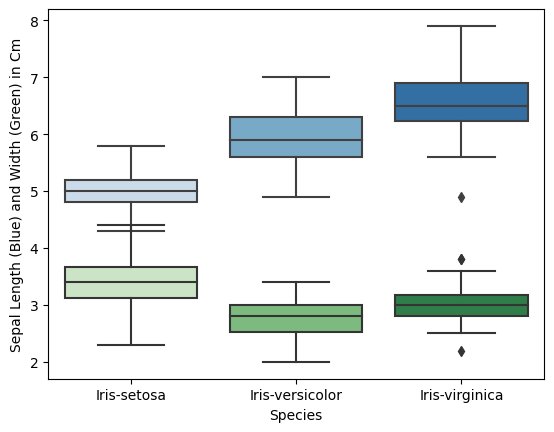

In [23]:
sns.boxplot(x="Species", y="SepalLengthCm", data=data, palette="Blues")
sns.boxplot(x="Species", y="SepalWidthCm", data=data, palette="Greens")
plt.xlabel("Species")
plt.ylabel("Sepal Length (Blue) and Width (Green) in Cm")

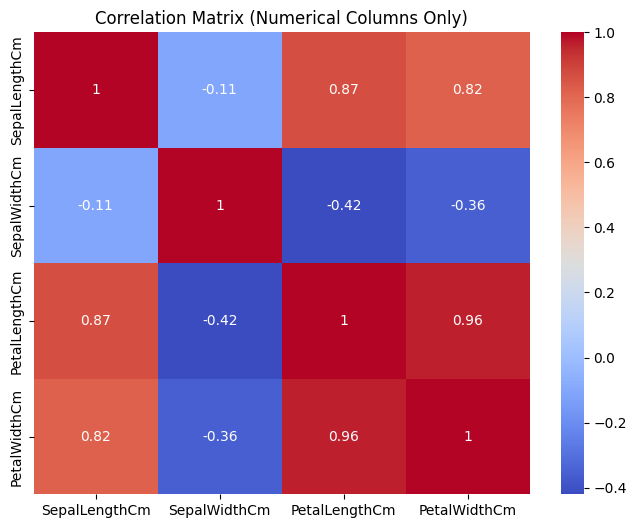

In [24]:
numerical_data = data.drop(columns=["Species"])
corr = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Columns Only)")
plt.show()